In [1]:
# Importando bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Modules.Helper import Helper
from Modules.Solvers import Solvers
from Modules.Plotters import Plotters
import pandas as pd
from Modules.Equation import Equation

In [2]:
labels = ['A', 'B', 'C', 'D', 'E']
df, max_data = Helper.load_data(filename='Data/ECOLI_DATA.txt', labels=labels)
initial_conditions = np.array([df[label].iloc[0] for label in labels])
t_span = (df['t'].iloc[0], df['t'].iloc[-1])  # Intervalo de tempo para simulações
t_eval = np.array(df['t'])  # Ponto de avaliação dos dados temporais
original = np.array(df[labels]).T  # Dados originais

In [3]:
# Melhor Indivíduo CMAES

coeffs={
    'A': {
        'A': {'n': 29.39724402841032, 'k': 1.1594641206002865}, 
        'C': {'n': 24.49948119119533, 'k': 0.673960738755205}, 
        'D': {'n': 24.39779550420871, 'k': 0.11764916376992597}, 
        'E': {'n': 1.0989626652413198, 'k': 1.1472536938906166}, 
        'tau': 1.5991249051223086
        }, 
    'B': {
        'A': {'n': 14.446799394623245, 'k': 1.56629134082702}, 
        'C': {'n': 0.2711853903781781, 'k': 1.3401325079915705}, 
        'D': {'n': 27.283516068007348, 'k': 0.16847088411986877}, 
        'E': {'n': 7.3682743157953405, 'k': 0.3198374951542493}, 
        'tau': 3.636640396680972
        }, 
    'C': {
        'D': {'n': 0.6873039710878059, 'k': 0.5305065660605939}, 
        'E': {'n': 21.01582418173714, 'k': 1.0305393815009727}, 
        'tau': 4.97829161538228
        }, 
    'D': {
        'C': {'n': 8.830064735941203, 'k': 0.682023851691849, '-': False}, 
        'tau': 0.1}, 
    'E': {
        'A': {'n': 22.07685622415742, 'k': 0.8747552666037866}, 
        'B': {'n': 4.174330455844837, 'k': 0.8215070546189033}, 
        'C': {'n': 12.427674531020548, 'k': 0.30250724728644873}, 
        'E': {'n': 5.599825384095897, 'k': 0.3856058859486441}, 
        'tau': 0.47478725164339874
        }
    }

In [4]:
# Melhor inbdivíduo DE


In [5]:
equation = Equation(coefficients=coeffs, labels=labels)

def system(t, y, equation):
        vals = [Solvers.norm_hardcoded(val, max_data[label]) for val, label in zip(y, labels)]
        N_A, N_B, N_C, N_D, N_E = vals
        
        dA = equation.complex_eqs(vals, 'A', [['-A', '-D', '-E'], ['-A', '-C', '+E'], ['+A', '+D', '-E']])
        dB = equation.complex_eqs(vals, 'B', [['-A', '-D', '-E'], ['-A', '-C', '+E'], ['+A', '+D', '-E']])
        dC = equation.complex_eqs(vals, 'C', [['+D'], ['+E']])
        dD = equation.full_eq(vals, 'D', 'C')
        dE = equation.complex_eqs(vals, 'E', [['+A', '+B', '+C'], ['+E']])

        return [dA, dB, dC, dD, dE]

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\MethodsAnalysis\Modules\Equation.py:12: RuntimeWarning: invalid value encountered in scalar power
  result = (val**nval / (val**nval + kval**nval))


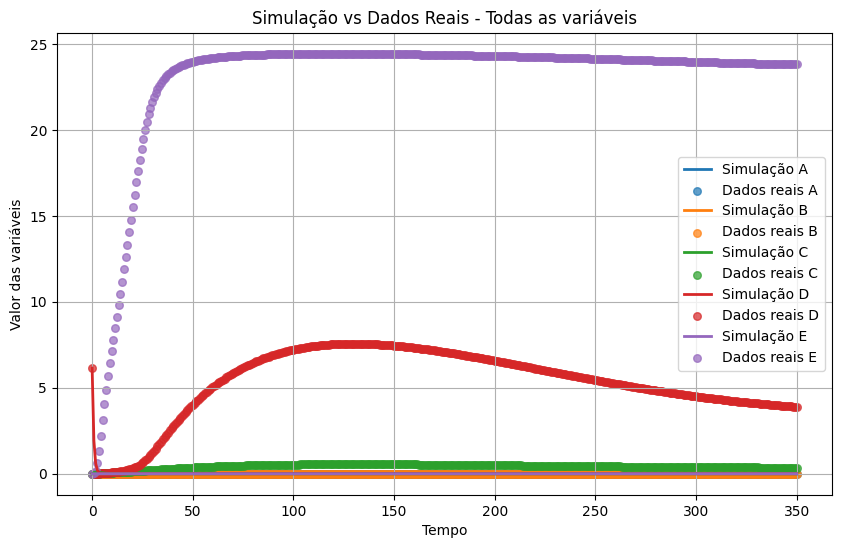

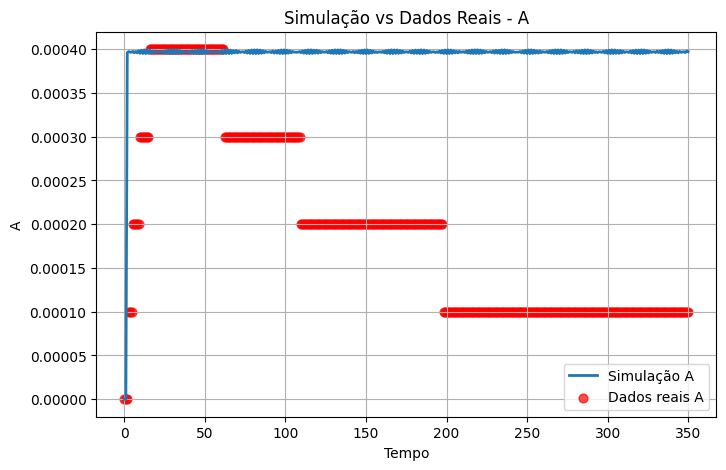

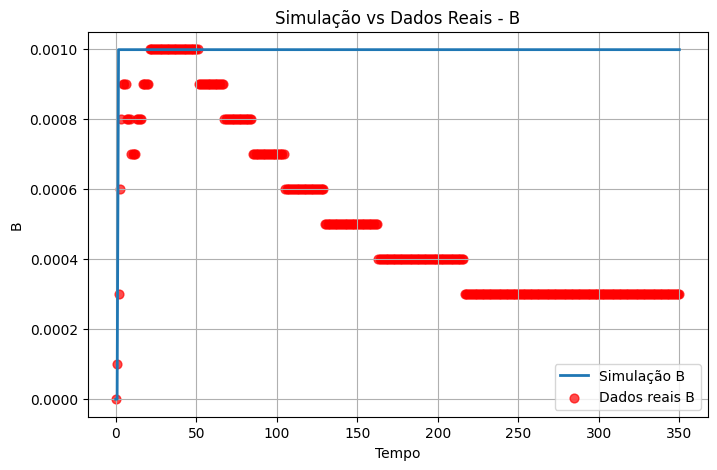

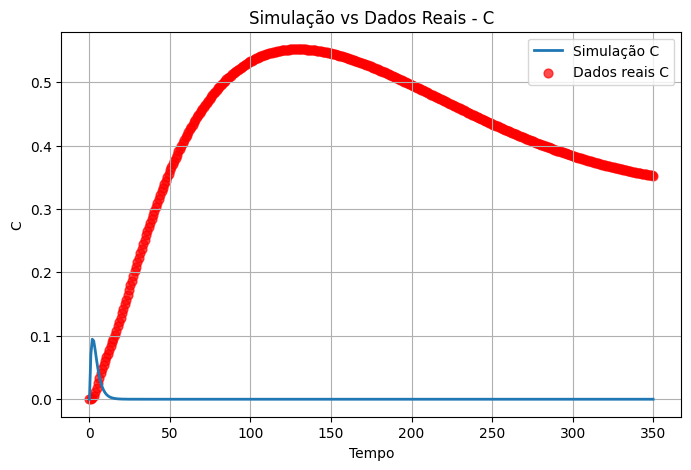

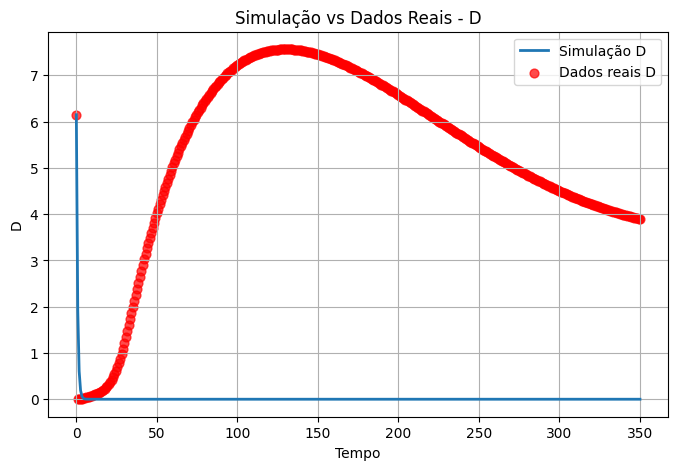

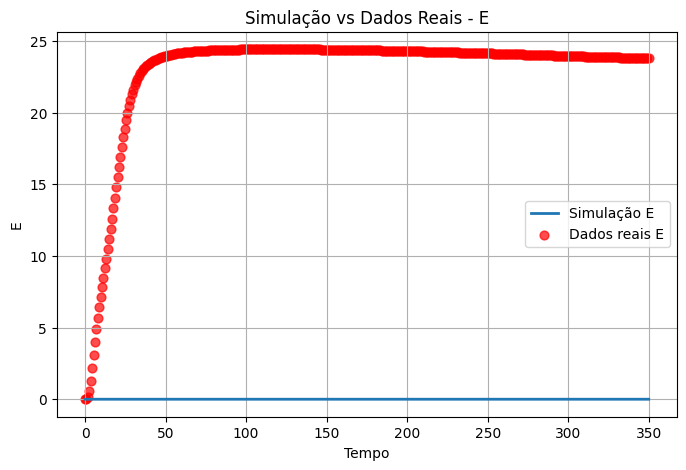

In [6]:
results = {}
methods = ['RK45']

for method in methods:
    results[method] = solve_ivp(
        system, t_span, initial_conditions,
        method=method, t_eval=t_eval, args=(equation,)
    ).y
    
    # --------- Gráfico com todas as curvas juntas ---------
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(labels):
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.7)
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel("Valor das variáveis")
    plt.title(f"Simulação vs Dados Reais - Todas as variáveis")
    plt.grid(True)
    plt.show()

    # --------- Gráfico individual para cada curva ---------
    for i, label in enumerate(labels):
        plt.figure(figsize=(8, 5))
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=40, alpha=0.7, color="red")
        plt.legend()
        plt.xlabel("Tempo")
        plt.ylabel(f"{label}")
        plt.title(f"Simulação vs Dados Reais - {label}")
        plt.grid(True)
        plt.show()


In [7]:
# # Dicionário com os dois conjuntos de coeficientes
# coeffs_dict = {
#     "CMAES": {
#         'A': {
#             'A': {'n': 24.359481567723428, 'k': 1.6230487104412776}, 
#             'B': {'n': 8.813093742430754, 'k': 1.0582389482943708}, 
#             'D': {'n': 7.300033283308039, 'k': 1.9500959426301654}, 
#             'tau': 2.6100326485283145
#             }, 
#         'B': {
#             'C': {'n': 2.685381856961304, 'k': 0.3774363311613684}, 
#             'D': {'n': 14.352590412986668, 'k': 0.3341776341957746}, 
#             'tau': 3.9588668046291393
#             }, 
#         'C': {
#             'A': {'n': 0.3194527547024098, 'k': 1.9084819726101825}, 
#             'D': {'n': 28.52750531104773, 'k': 0.35778636980868167}, 
#             'tau': 4.831063955192538
#             }, 
#         'D': {
#             'A': {'n': 26.772700065284713, 'k': 0.9748525323386317}, 
#             'D': {'n': 21.044938430094405, 'k': 0.1000936942714131}, 
#             'tau': 0.8239226659903076
#             }
#     },
#     "DE": {
#         'A': {
#             'A': {'n': 15.777579519984542, 'k': 1.4359643199181944}, 
#             'B': {'n': 20.324778231437712, 'k': 1.239668586515773}, 
#             'D': {'n': 24.272823696579138, 'k': 1.464793207572984}, 
#             'tau': 1.7183366909446591
#             }, 
#         'B': {
#             'C': {'n': 2.6631739011105005, 'k': 0.6094909723583404}, 
#             'D': {'n': 29.102605257152725, 'k': 0.6674074833028822}, 
#             'tau': 3.262568460392146
#             }, 
#         'C': {
#             'A': {'n': 0.6148457501858768, 'k': 1.028863325775088}, 
#             'D': {'n': 29.280697898464915, 'k': 0.30749102284342633}, 
#             'tau': 4.8573658620719256
#             }, 
#         'D': {
#             'A': {'n': 29.96835065622337, 'k': 0.9557516143950923}, 
#             'D': {'n': 18.665026706358425, 'k': 0.22346517479854078}, 
#             'tau': 0.7443431305187935
#             }
#     }
# }

# # Rodar as simulações para cada conjunto
# results = {}
# for name, coeffs in coeffs_dict.items():
#     equation = Equation(coefficients=coeffs, labels=labels)
#     sol = solve_ivp(
#         system, t_span, initial_conditions,
#         method="RK45", t_eval=t_eval, args=(equation,)
#     )
#     results[name] = sol.y

# # --------- Gráfico com todas as curvas juntas (CMAES contínuo, DE tracejado) ---------
# import matplotlib.pyplot as plt

# # Paleta discreta com cores bem distintas
# palette = plt.get_cmap("tab10").colors  # até 10 cores bem diferentes
# # Se tiver mais que 10 labels, dá pra usar "tab20" ou misturar paletas

# # --------- Gráfico com todas as curvas juntas ---------
# plt.figure(figsize=(12, 7))
# for i, label in enumerate(labels):
#     color = palette[i % len(palette)]  # garante repetição caso tenha >10 labels

#     # CMAES (linha contínua)
#     plt.plot(t_eval, results["CMAES"][i], label=f'CMAES - {label}', linestyle='-', color=color)

#     # DE (linha tracejada)
#     plt.plot(t_eval, results["DE"][i], label=f'DE - {label}', linestyle='--', color=color)

#     # Dados reais (pontos)
#     plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.6, color=color)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlabel("Tempo")
# plt.ylabel("Valor das variáveis")
# plt.title("Simulação vs Dados Reais - Todas as variáveis")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# # --------- Gráfico individual para cada curva ---------
# for i, label in enumerate(labels):
#     plt.figure(figsize=(8, 5))
#     for name, sol in results.items():
#         plt.plot(t_eval, sol[i], label=f'{name} - Simulação {label}', linewidth=2)
#     plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=40, alpha=0.7, color="red")
#     plt.legend()
#     plt.xlabel("Tempo")
#     plt.ylabel(f"{label}")
#     plt.title(f"Simulação vs Dados Reais - {label}")
#     plt.grid(True)
#     plt.show()
